### Recrystallization Fraction Estimation

##### Random Forest Regresssion Model

In [205]:
import numpy as np
import pandas as pd

In [206]:
df = pd.read_csv("Recryst_Dataset_2.csv")
df

Temperature  Strain rate  Strain   Stress  Recrystallization  \
0           1193        0.001   0.181  190.500              0.044   
1           1193        0.001   0.304  191.120              0.125   
2           1193        0.001   0.402  183.030              0.287   
3           1193        0.001   0.510  173.810              0.441   
4           1193        0.001   0.608  167.420              0.588   
..           ...          ...     ...      ...                ...   
212         1313        1.000   0.800  301.504              0.625   
213         1313        1.000   0.892  298.665              0.721   
214         1313        1.000   0.995  295.465              0.801   
215         1313        1.000   1.108  292.523              0.868   
216         1313        1.000   1.194  291.594              0.897   

     log(strain_rate)  exp(Q/RT)         Z  exp(Strain rate)  1/Strain rate  \
0           -6.907755   1.223409  0.001223          1.001000           1000   
1           -6.907755   1.223409  0.001223          1.001000           1000   
2           -6.907755   1.223409  0.001223          1.001000           1000   
3           -6.907755   1.223409  0.001223          1.001000           1000   
4           -6.907755   1.223409  0.001223          1.001000           1000   
..                ...        ...       ...               ...            ...   
212          0.000000   1.201070  1.201070          2.718282              1   
213          0.000000   1.201070  1.201070          2.718282              1   
214          0.000000   1.201070  1.201070          2.718282              1   
215          0.000000   1.201070  1.201070          2.718282              1   
216          0.000000   1.201070  1.201070          2.718282              1   

     Strain rate^0.5  
0           0.031623  
1           0.031623  
2           0.031623  
3           0.031623  
4           0.031623  
..               ...  
212         1.000000  
213         1.000000  
214         1.000000  
215         1.000000  
216         1.000000  

[217 rows x 11 columns]

In [207]:
#after removing Temperature = 1253K data
df1 = df[df['Temperature'] != 1253]
df1

Temperature  Strain rate  Strain   Stress  Recrystallization  \
0           1193        0.001   0.181  190.500              0.044   
1           1193        0.001   0.304  191.120              0.125   
2           1193        0.001   0.402  183.030              0.287   
3           1193        0.001   0.510  173.810              0.441   
4           1193        0.001   0.608  167.420              0.588   
..           ...          ...     ...      ...                ...   
212         1313        1.000   0.800  301.504              0.625   
213         1313        1.000   0.892  298.665              0.721   
214         1313        1.000   0.995  295.465              0.801   
215         1313        1.000   1.108  292.523              0.868   
216         1313        1.000   1.194  291.594              0.897   

     log(strain_rate)  exp(Q/RT)         Z  exp(Strain rate)  1/Strain rate  \
0           -6.907755   1.223409  0.001223          1.001000           1000   
1           -6.907755   1.223409  0.001223          1.001000           1000   
2           -6.907755   1.223409  0.001223          1.001000           1000   
3           -6.907755   1.223409  0.001223          1.001000           1000   
4           -6.907755   1.223409  0.001223          1.001000           1000   
..                ...        ...       ...               ...            ...   
212          0.000000   1.201070  1.201070          2.718282              1   
213          0.000000   1.201070  1.201070          2.718282              1   
214          0.000000   1.201070  1.201070          2.718282              1   
215          0.000000   1.201070  1.201070          2.718282              1   
216          0.000000   1.201070  1.201070          2.718282              1   

     Strain rate^0.5  
0           0.031623  
1           0.031623  
2           0.031623  
3           0.031623  
4           0.031623  
..               ...  
212         1.000000  
213         1.000000  
214         1.000000  
215         1.000000  
216         1.000000  

[178 rows x 11 columns]

In [208]:
#remove the null value raw
df1 = df1.dropna(axis=0)
df1.isnull().sum()

Temperature          0
Strain rate          0
Strain               0
Stress               0
Recrystallization    0
log(strain_rate)     0
exp(Q/RT)            0
Z                    0
exp(Strain rate)     0
1/Strain rate        0
Strain rate^0.5      0
dtype: int64

In [209]:
#Independent variable
data_rf = df1.drop(['Recrystallization'],axis = 1)
data_rf.head()

Temperature  Strain rate  Strain  Stress  log(strain_rate)  exp(Q/RT)  \
0         1193        0.001   0.181  190.50         -6.907755   1.223409   
1         1193        0.001   0.304  191.12         -6.907755   1.223409   
2         1193        0.001   0.402  183.03         -6.907755   1.223409   
3         1193        0.001   0.510  173.81         -6.907755   1.223409   
4         1193        0.001   0.608  167.42         -6.907755   1.223409   

          Z  exp(Strain rate)  1/Strain rate  Strain rate^0.5  
0  0.001223             1.001           1000         0.031623  
1  0.001223             1.001           1000         0.031623  
2  0.001223             1.001           1000         0.031623  
3  0.001223             1.001           1000         0.031623  
4  0.001223             1.001           1000         0.031623

In [210]:
#dependent variable
target_rf = df1.Recrystallization
target_rf.head()

0    0.044
1    0.125
2    0.287
3    0.441
4    0.588
Name: Recrystallization, dtype: float64

In [211]:
#convert dataset 80% training and 20% testing
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data_rf,target_rf,test_size=0.2)

In [212]:
#Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=8)
model_rf.fit(data_train,target_train)

RandomForestRegressor(n_estimators=8)

In [213]:
model_rf.score(data_test,target_test)

0.928058744565726

In [214]:
#Independent variable impact on the dependent variable(strain and stress most impacted variable)
importances = pd.DataFrame({'feature':data_train.columns,'importance':np.round(model_rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

importance
feature                     
Strain                 0.587
Stress                 0.339
Z                      0.055
exp(Strain rate)       0.007
Temperature            0.006
Strain rate            0.002
exp(Q/RT)              0.002
log(strain_rate)       0.001
1/Strain rate          0.001
Strain rate^0.5        0.000

In [245]:
#hyperparameter tunning for finding no. of trees for best result
arr = np.arange(1, 101, 2)
pred = np.array([])
for i in arr:
    model_rf = RandomForestRegressor(n_estimators=i)
    model_rf.fit(data_train,target_train)
    temp = model_rf.score(data_test,target_test)
    pred = np.append(pred,temp)
pred = np.column_stack((pred,arr))
pred = pd.DataFrame(pred,columns=['Score', 'Number of Trees'])
pred.head()

Score  Number of Trees
0  0.778851              1.0
1  0.910290              3.0
2  0.950030              5.0
3  0.923864              7.0
4  0.946380              9.0

[Text(0.5, 1.0, 'Predicted score')]

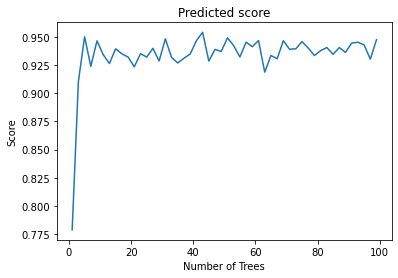

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x = 'Number of Trees',y = 'Score',data = pred,palette = 'dark').set(title="Predicted score")

### Without Stress

In [217]:
#after removing stress data apply RF model and find score
data_rf_1 = df1.drop(['Recrystallization','Stress'],axis = 1)
target_rf_1 = df1.Recrystallization
data_train_1, data_test_1, target_train_1, target_test_1 = train_test_split(data_rf_1,target_rf_1,test_size=0.2)
model_rf_1 = RandomForestRegressor(n_estimators=8)
model_rf_1.fit(data_train_1,target_train_1)
model_rf_1.score(data_test_1,target_test_1)

0.8876076220283606

In [218]:
#Independent variable impact on the dependent variable(strain and Z most impacted variable)
importances = pd.DataFrame({'feature':data_train_1.columns,'importance':np.round(model_rf_1.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

importance
feature                     
Strain                 0.601
Z                      0.302
exp(Q/RT)              0.048
Temperature            0.032
1/Strain rate          0.010
Strain rate            0.002
exp(Strain rate)       0.002
Strain rate^0.5        0.002
log(strain_rate)       0.001

### WithOut Stress and Zener Parameter

In [219]:
#after removing stress and zener parameter data apply RF model and find score
data_rf_2 = df1.drop(['Recrystallization','Stress','Z'],axis = 1)
target_rf_2 = df1.Recrystallization
data_train_2, data_test_2, target_train_2, target_test_2 = train_test_split(data_rf_2,target_rf_2,test_size=0.2)
model_rf_2 = RandomForestRegressor(n_estimators=8)
model_rf_2.fit(data_train_2,target_train_2)
model_rf_2.score(data_test_2,target_test_2)

0.9365542335171313

In [220]:
#Independent variable impact on the dependent variable
importances = pd.DataFrame({'feature':data_train_2.columns,'importance':np.round(model_rf_2.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

importance
feature                     
Strain                 0.596
Temperature            0.090
1/Strain rate          0.084
exp(Q/RT)              0.069
exp(Strain rate)       0.060
log(strain_rate)       0.050
Strain rate            0.032
Strain rate^0.5        0.019

### WithOut Strain and Zener Parameter

In [221]:
#after removing strain and zener parameter data apply RF model and find score
data_rf_3 = df1.drop(['Recrystallization','Strain','Z'],axis = 1)
target_rf_3 = df1.Recrystallization
data_train_3, data_test_3, target_train_3, target_test_3 = train_test_split(data_rf_3,target_rf_3,test_size=0.2)
model_rf_3 = RandomForestRegressor(n_estimators=8)
model_rf_3.fit(data_train_3,target_train_3)
model_rf_3.score(data_test_3,target_test_3)

0.49358187554601973

In [222]:
#Independent variable impact on the dependent variable(stress and exp(Q/RT) most impacted variable)
importances = pd.DataFrame({'feature':data_train_3.columns,'importance':np.round(model_rf_3.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

importance
feature                     
Stress                 0.835
exp(Q/RT)              0.044
1/Strain rate          0.035
Temperature            0.032
Strain rate^0.5        0.029
Strain rate            0.019
log(strain_rate)       0.004
exp(Strain rate)       0.003

In [223]:
from sklearn.tree import export_graphviz
estimator = model_rf.estimators_[1]
export_graphviz(estimator, 'tree.dot', feature_names = data_train.columns)

In [224]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

In [225]:
# visualize Random forest tree using graphviz
from IPython.display import Image
Image(filename = 'tree.png')

In [226]:
data_1193= df[df['Temperature'] == 1193].drop(['Recrystallization'],axis = 1).to_numpy()
data_1223= df[df['Temperature'] == 1223].drop(['Recrystallization'],axis = 1).to_numpy()
data_1253= df[df['Temperature'] == 1253].drop(['Recrystallization'],axis = 1).to_numpy()
data_1283= df[df['Temperature'] == 1283].drop(['Recrystallization'],axis = 1).to_numpy()
data_1313= df[df['Temperature'] == 1313].drop(['Recrystallization'],axis = 1).to_numpy()

In [227]:
#predicted recrystallization fraction for T = 1193K
pred = np.array([])
for i in data_1193:
    temp = model_rf.predict([i])
    pred = np.append(pred,temp) 
pred_1193 = np.column_stack((data_1193,pred))

In [228]:
pred_1193 = pd.DataFrame(pred_1193,columns=['Temperature','Strain rate','Strain','Stress','log(strain_rate)','exp(Q/RT)','Z','exp(Strain rate)','1/Strain rate','Strain rate^0.5','Pred_recry'])
pred_1193.to_csv("pred_1193.csv",index=False)

In [229]:
#predicted recrystallization fraction for T = 1223K
pred = np.array([])
for i in data_1223:
    temp = model_rf.predict([i])
    pred = np.append(pred,temp) 
pred_1223 = np.column_stack((data_1223,pred))

In [230]:
pred_1223 = pd.DataFrame(pred_1223,columns=['Temperature','Strain rate','Strain','Stress','log(strain_rate)','exp(Q/RT)','Z','exp(Strain rate)','1/Strain rate','Strain rate^0.5','Pred_recry'])
pred_1223.to_csv("pred_1223.csv",index=False)

In [231]:
#predicted recrystallization fraction for T = 1253K
pred = np.array([])
for i in data_1253:
    temp = model_rf.predict([i])
    pred = np.append(pred,temp) 
pred_1253 = np.column_stack((data_1253,pred))

In [232]:
pred_1253 = pd.DataFrame(pred_1253,columns=['Temperature','Strain rate','Strain','Stress','log(strain_rate)','exp(Q/RT)','Z','exp(Strain rate)','1/Strain rate','Strain rate^0.5','Pred_recry'])
pred_1253.to_csv("pred_1253.csv",index=False)

In [233]:
#predicted recrystallization fraction for T = 1283K
pred = np.array([])
for i in data_1283:
    temp = model_rf.predict([i])
    pred = np.append(pred,temp) 
pred_1283 = np.column_stack((data_1283,pred))

In [234]:
pred_1283 = pd.DataFrame(pred_1283,columns=['Temperature','Strain rate','Strain','Stress','log(strain_rate)','exp(Q/RT)','Z','exp(Strain rate)','1/Strain rate','Strain rate^0.5','Pred_recry'])
pred_1283.to_csv("pred_1283.csv",index=False)

In [235]:
#predicted recrystallization fraction for T = 1313K
pred = np.array([])
for i in data_1313:
    temp = model_rf.predict([i])
    pred = np.append(pred,temp) 
pred_1313 = np.column_stack((data_1313,pred))

In [236]:
pred_1313 = pd.DataFrame(pred_1313,columns=['Temperature','Strain rate','Strain','Stress','log(strain_rate)','exp(Q/RT)','Z','exp(Strain rate)','1/Strain rate','Strain rate^0.5','Pred_recry'])
pred_1313.to_csv("pred_1313.csv",index=False)

In [237]:
df_1193 = df[df['Temperature'] == 1193]
df_1223 = df[df['Temperature'] == 1223]
df_1253 = df[df['Temperature'] == 1253]
df_1283 = df[df['Temperature'] == 1283]
df_1313 = df[df['Temperature'] == 1313]

In [238]:
pred_1193 = pred_1193[pred_1193['Strain']>=0.1]
pred_1223 = pred_1223[pred_1223['Strain']>=0.1]
pred_1253 = pred_1253[pred_1253['Strain']>=0.1]
pred_1283 = pred_1283[pred_1283['Strain']>=0.1]
pred_1313 = pred_1313[pred_1313['Strain']>=0.1]

In [239]:
#plotting libraries 
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'For T = 1193 K')

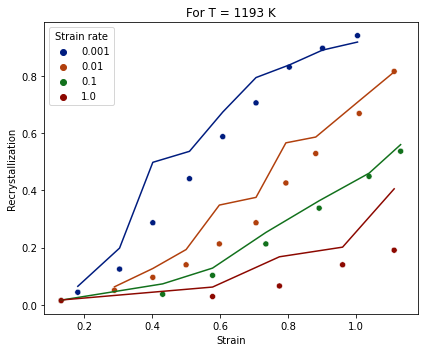

In [240]:
#comparison plot between experiment and predicted data For T = 1193 K
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(6, 5), tight_layout=True)
sns.scatterplot(x = 'Strain',y = 'Recrystallization',data = df_1193,hue = 'Strain rate',palette = 'dark')
sns.lineplot(x = 'Strain',y = 'Pred_recry',data = pred_1193,hue = 'Strain rate',palette = 'dark',legend = False)
plt.title("For T = 1193 K")

Text(0.5, 1.0, 'For T = 1223 K')

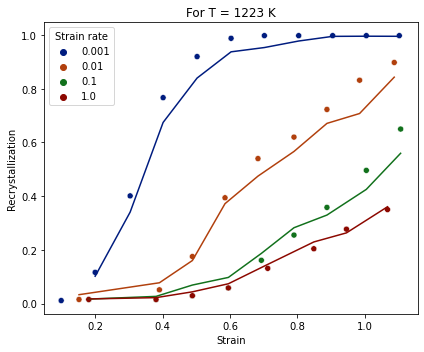

In [241]:
#comparison plot between experiment and predicted data For T = 1223 K
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(6, 5), tight_layout=True)
sns.scatterplot(x = 'Strain',y = 'Recrystallization',data = df_1223,hue = 'Strain rate',palette = 'dark')
sns.lineplot(x = 'Strain',y = 'Pred_recry',data = pred_1223,hue = 'Strain rate',palette = 'dark',legend = False)
plt.title("For T = 1223 K")

Text(0.5, 1.0, 'For T = 1253 K')

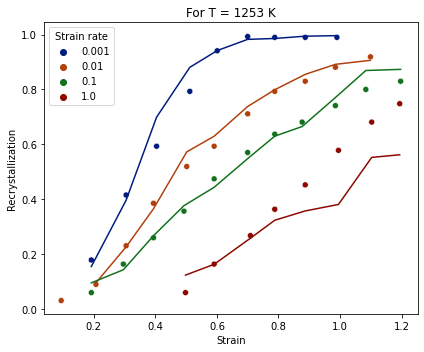

In [242]:
#comparison plot between experiment and predicted data For T = 1253 K
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(6, 5), tight_layout=True)
sns.scatterplot(x = 'Strain',y = 'Recrystallization',data = df_1253,hue = 'Strain rate',palette = 'dark')
sns.lineplot(x = 'Strain',y = 'Pred_recry',data = pred_1253,hue = 'Strain rate',palette = 'dark',legend = False)
plt.title("For T = 1253 K")

Text(0.5, 1.0, 'For T = 1283 K')

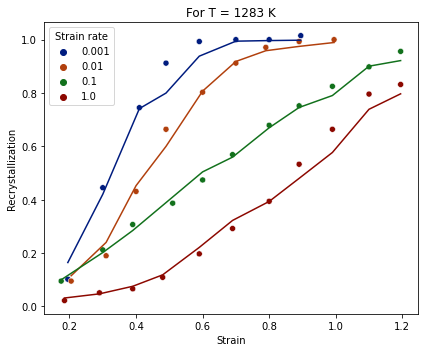

In [243]:
#comparison plot between experiment and predicted data For T = 1283 K
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(6, 5), tight_layout=True)
sns.scatterplot(x = 'Strain',y = 'Recrystallization',data = df_1283,hue = 'Strain rate',palette = 'dark')
sns.lineplot(x = 'Strain',y = 'Pred_recry',data = pred_1283,hue = 'Strain rate',palette = 'dark',legend = False)
plt.title("For T = 1283 K")

Text(0.5, 1.0, 'For T = 1313 K')

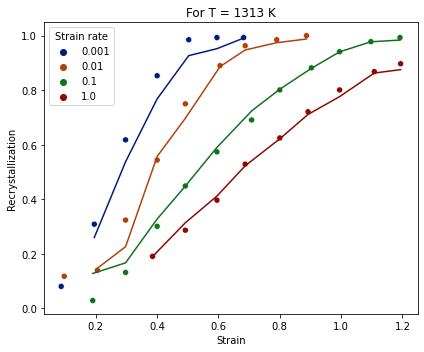

In [244]:
#comparison plot between experiment and predicted data For T = 1313 K
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(6, 5), tight_layout=True)
sns.scatterplot(x = 'Strain',y = 'Recrystallization',data = df_1313,hue = 'Strain rate',palette = 'dark')
sns.lineplot(x = 'Strain',y = 'Pred_recry',data = pred_1313,hue = 'Strain rate',palette = 'dark',legend = False)
plt.title("For T = 1313 K")